In [1]:
import numpy as np
import os

def load_all_arrays(path_to_folder, system_boundary):
    # A dictionary to store the arrays for a specific system boundary
    scenarios = {'LD': [], 'HD': [], 'RW': [], 'ND': []}
    
    for filename in os.listdir(path_to_folder):
        if filename.endswith('.npy'):
            # Parse the scenario and system boundary from the filename
            scenario, file_system_boundary, building_scenario = filename.split('_')

            # Only load the array if the system boundary matches the one specified
            if file_system_boundary == system_boundary:
                # Load the array
                array = np.load(os.path.join(path_to_folder, filename))
                # Append the array to the corresponding list in the dictionary
                scenarios[building_scenario[:-4]].append(array)  # remove .npy from building_scenario

    # Convert lists of arrays into single 4D arrays for each scenario
    for scenario, arrays in scenarios.items():
        scenarios[scenario] = np.stack(arrays)

    return scenarios

# Load arrays for a specific system boundary
path_to_folder = '/home/haithamth/Documents/results_building_level_sen2'   # replace with your actual folder path
system_boundary = 'ISD'  # replace with your desired system boundary
scenarios = load_all_arrays(path_to_folder, system_boundary)


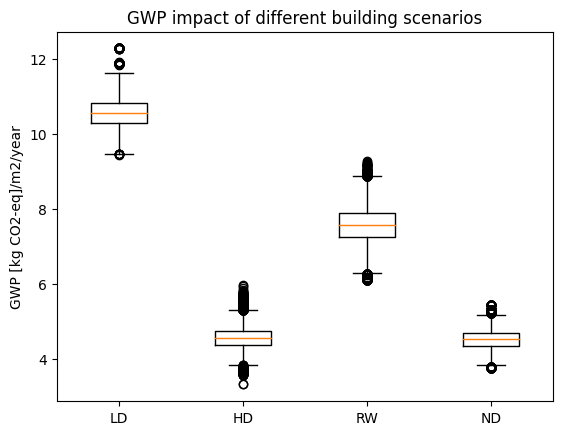

In [2]:
import matplotlib.pyplot as plt

def plot_scenarios(scenarios, impact_category_index):
    # Prepare a list to collect data for each building scenario
    data = []
    labels = []
    
    for scenario_name, scenario_array in scenarios.items():
        # Extract data for the specific impact category, resulting in a (6, 80, 80) array
        impact_data = scenario_array[:, :, impact_category_index, :]
        
        # Concatenate along the Monte Carlo simulations dimensions and flatten
        flattened_data = impact_data.reshape(-1)  # this will result in a 1D array

        data.append(flattened_data)
        labels.append(scenario_name)
        
    # Create a boxplot
    plt.boxplot(data, labels=labels)
    plt.title(f'GWP impact of different building scenarios')
    # y label
    plt.ylabel('GWP [kg CO2-eq]/m2/year')
    fig1 = plt.gcf()
    # fig1.savefig('boxplot.png', dpi=1000)
    plt.show()
    # save fig with 1000 dpi
    

# Plot scenarios for a specific impact category
impact_category_index = 1  # replace with your desired impact category index
plot_scenarios(scenarios, impact_category_index)